In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
from test import load_grayscale, unnormalize, load_grayscale_from_colored, predict
from skimage import io

from model.resnet_unet import ResNetBasedUNet

device = torch.device('cuda')

In [2]:
model_path = '../checkpoint/lr0.0001_2020-05-21-08-28-06_all_layers_and_pixel_loss_frozen_enc/epoch0_iter19999.pt'
model = torch.nn.DataParallel(ResNetBasedUNet().to(device))

# model.eval()

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

<ipython-input-3-34ee64492420>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-3-34ee64492420>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-3-34ee64492420>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-3-34ee64492420>:40: RuntimeW

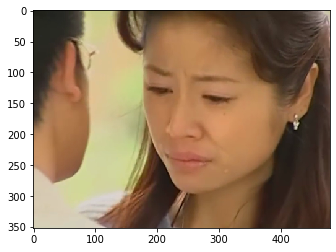

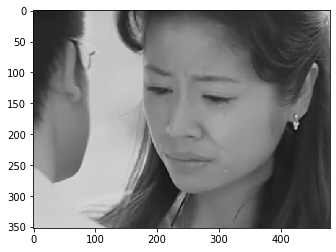

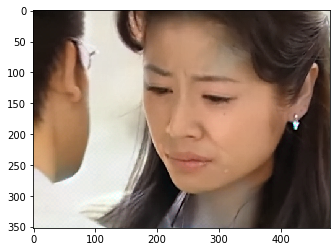

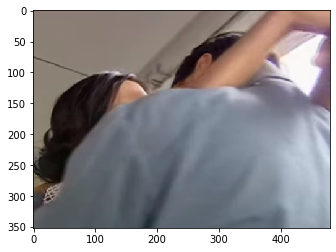

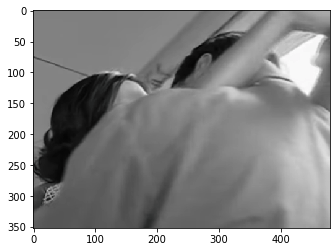

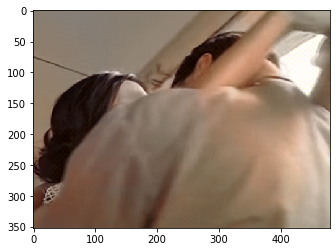

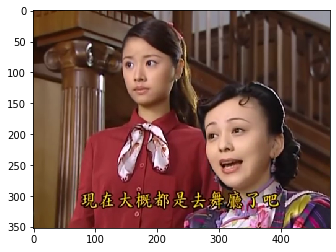

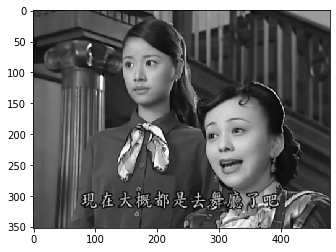

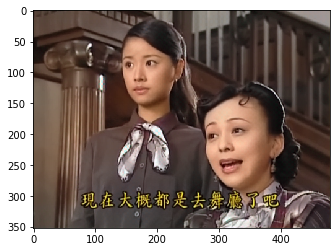

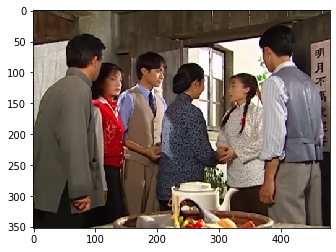

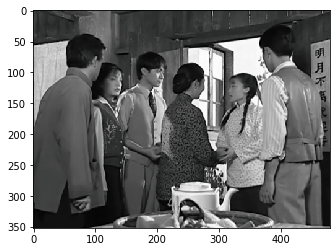

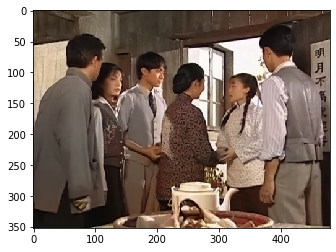

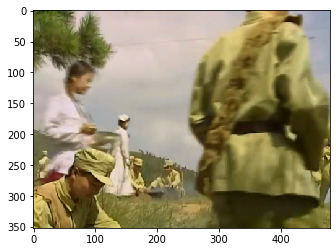

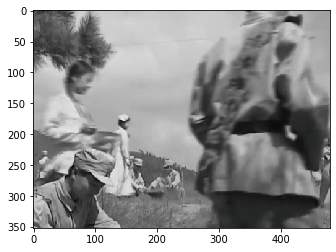

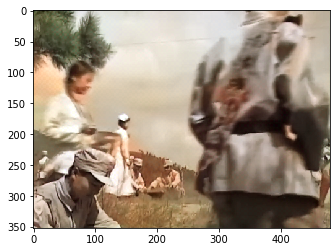

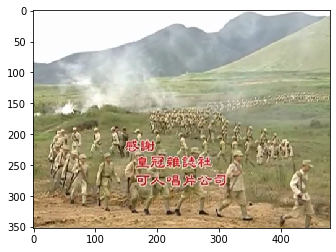

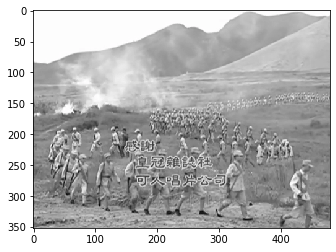

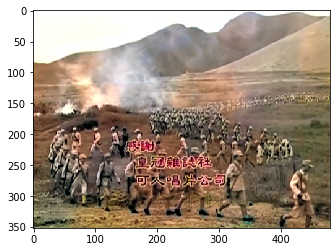

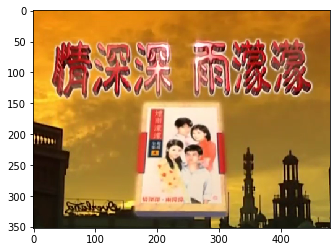

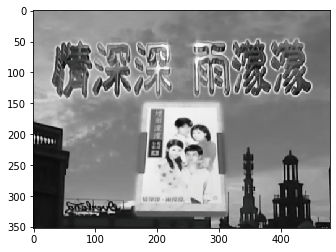

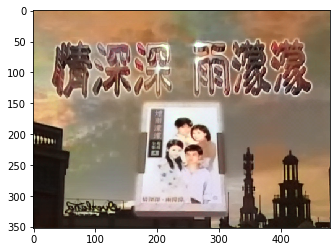

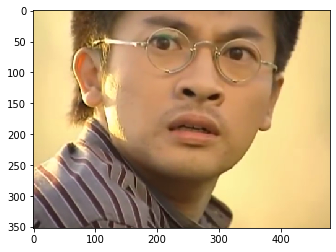

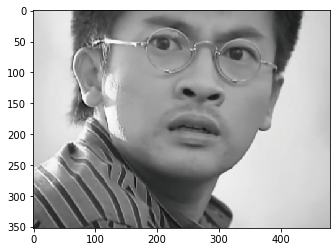

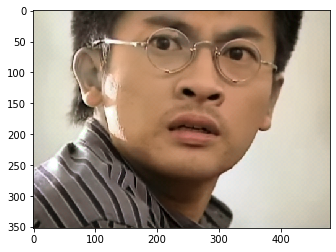

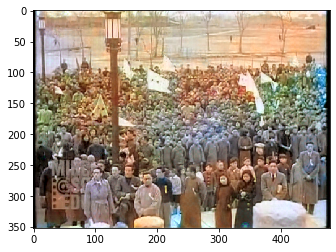

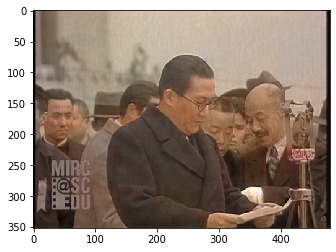

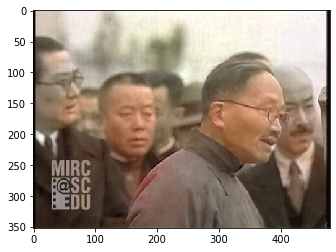

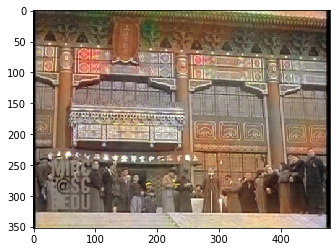

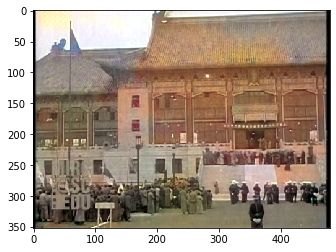

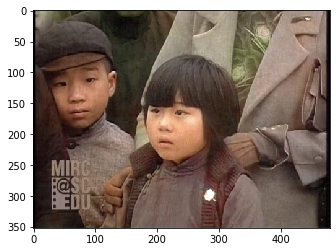

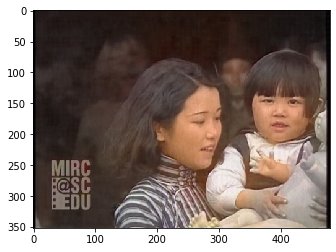

In [3]:
color_images = [
    '../../../datasets/train/qing-ep38-03894.png',
    '../../../datasets/train/qing-ep49-04922.png',
    '../../../datasets/train/qing-ep13-01085.png',
    '../../../datasets/train/qing-ep26-02252.png',
    '../../../datasets/test/qing-ep35-01021.png',
    '../../../datasets/test/qing-ep05-05443.png',
    '../../../datasets/test/qing-ep35-05470.png',
    '../../../datasets/test/qing-ep15-05389.png',
]

crowd = '../../bw-frames/00003.png'
mayor = '../../bw-frames/00008.png'
cai = '../../bw-frames/00025.png'
cityhall = '../../bw-frames/00028.png'
children_closeup = '../../bw-frames/00047.png'
cityhall_far = '../../bw-frames/00056.png'
mother = '../../bw-frames/00086.png'

bw_images = [crowd, mayor, cai, cityhall, cityhall_far, children_closeup, mother]

for path in color_images:
    original = io.imread(path)[4:-4]
    plt.figure()
    plt.imshow(original)

    img = load_grayscale_from_colored(path).unsqueeze(0)
    rgb_output = predict(model, img, device).squeeze().permute(1, 2, 0)

    plt.figure()
    unnormalized_img = unnormalize(img).squeeze()
    plt.imshow(unnormalized_img.permute(1, 2, 0).numpy())

    plt.figure()
    plt.imshow(rgb_output.cpu().numpy())

for path in bw_images:
    img = load_grayscale(path).unsqueeze(0)
    rgb_output = predict(model, img, device).squeeze().permute(1, 2, 0)
    plt.figure()
    plt.imshow(rgb_output.cpu().numpy())
